# Comparing KNN to OLS Regression

[Data](https://archive.ics.uci.edu/ml/datasets/Stock+portfolio+performance#)

## Initial look into the data

In [1]:
# Import modules.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model

# Set aesthetics
%matplotlib inline
sns.set_style('white')
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [2]:
data = pd.read_csv('~/src/data/unit3/portfolio-performance-20-years.csv')
print(data.shape)
data.head()

(63, 19)


,ID,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return,Excess Return,Systematic Risk,Total Risk,Abs. Win Rate,Rel. Win Rate,Annual Return.1,Excess Return.1,Systematic Risk.1,Total Risk.1,Abs. Win Rate.1,Rel. Win Rate.1
0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.139,0.010,1.33,0.149,0.663,0.525,0.531875,0.478116,0.738015,0.800000,0.52,0.411765
1,2,0.0,1.0,0.0,0.0,0.0,0.0,0.143,0.010,1.17,0.108,0.663,0.650,0.549712,0.487595,0.571579,0.412231,0.52,0.764706
2,3,0.0,0.0,1.0,0.0,0.0,0.0,0.173,0.018,1.30,0.144,0.638,0.513,0.692625,0.629895,0.703051,0.756879,0.44,0.376471
3,4,0.0,0.0,0.0,1.0,0.0,0.0,0.096,-0.002,1.39,0.144,0.613,0.475,0.324351,0.255634,0.800000,0.756046,0.36,0.270588
4,5,0.0,0.0,0.0,0.0,1.0,0.0,0.096,0.001,1.04,0.087,0.725,0.538,0.326615,0.306501,0.432452,0.209289,0.72,0.447059


In [3]:
data.columns

Index(['ID', ' Large B/P ', ' Large ROE ', ' Large S/P ',
       ' Large Return Rate in the last quarter ', ' Large Market Value ',
       ' Small systematic Risk', 'Annual Return', 'Excess Return',
       'Systematic Risk', 'Total Risk', 'Abs. Win Rate', 'Rel. Win Rate',
       'Annual Return.1', 'Excess Return.1', 'Systematic Risk.1',
       'Total Risk.1', 'Abs. Win Rate.1', 'Rel. Win Rate.1'],
      dtype='object')

In [4]:
cols_to_drop = ['ID', 'Annual Return', 'Excess Return', 'Systematic Risk',
                'Total Risk', 'Abs. Win Rate', 'Rel. Win Rate']
df = data.drop(cols_to_drop, axis=1)
df.head()

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return.1,Excess Return.1,Systematic Risk.1,Total Risk.1,Abs. Win Rate.1,Rel. Win Rate.1
0,1.0,0.0,0.0,0.0,0.0,0.0,0.531875,0.478116,0.738015,0.800000,0.52,0.411765
1,0.0,1.0,0.0,0.0,0.0,0.0,0.549712,0.487595,0.571579,0.412231,0.52,0.764706
2,0.0,0.0,1.0,0.0,0.0,0.0,0.692625,0.629895,0.703051,0.756879,0.44,0.376471
3,0.0,0.0,0.0,1.0,0.0,0.0,0.324351,0.255634,0.800000,0.756046,0.36,0.270588
4,0.0,0.0,0.0,0.0,1.0,0.0,0.326615,0.306501,0.432452,0.209289,0.72,0.447059


In [5]:
df.columns

Index([' Large B/P ', ' Large ROE ', ' Large S/P ',
       ' Large Return Rate in the last quarter ', ' Large Market Value ',
       ' Small systematic Risk', 'Annual Return.1', 'Excess Return.1',
       'Systematic Risk.1', 'Total Risk.1', 'Abs. Win Rate.1',
       'Rel. Win Rate.1'],
      dtype='object')

In [6]:
df.columns = df.columns.str.replace(' ', '')
df.columns = df.columns.str.replace('.', '')
df.columns

Index(['LargeB/P', 'LargeROE', 'LargeS/P', 'LargeReturnRateinthelastquarter',
       'LargeMarketValue', 'SmallsystematicRisk', 'AnnualReturn1',
       'ExcessReturn1', 'SystematicRisk1', 'TotalRisk1', 'AbsWinRate1',
       'RelWinRate1'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 12 columns):
LargeB/P                           63 non-null float64
LargeROE                           63 non-null float64
LargeS/P                           63 non-null float64
LargeReturnRateinthelastquarter    63 non-null float64
LargeMarketValue                   63 non-null float64
SmallsystematicRisk                63 non-null float64
AnnualReturn1                      63 non-null float64
ExcessReturn1                      63 non-null float64
SystematicRisk1                    63 non-null float64
TotalRisk1                         63 non-null float64
AbsWinRate1                        63 non-null float64
RelWinRate1                        63 non-null float64
dtypes: float64(12)
memory usage: 6.0 KB


In [8]:
df.describe()

,LargeB/P,LargeROE,LargeS/P,LargeReturnRateinthelastquarter,LargeMarketValue,SmallsystematicRisk,AnnualReturn1,ExcessReturn1,SystematicRisk1,TotalRisk1,AbsWinRate1,RelWinRate1
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,0.166619,0.166619,0.166619,0.166619,0.166619,0.166619,0.580151,0.576170,0.426494,0.391749,0.566984,0.547899
std,0.199304,0.199304,0.199304,0.199304,0.199304,0.199304,0.133358,0.137047,0.118178,0.136653,0.112803,0.159468
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.525811,0.519093,0.358600,0.297324,0.520000,0.411765
50%,0.167000,0.167000,0.167000,0.167000,0.167000,0.167000,0.598516,0.587148,0.403418,0.368958,0.560000,0.552941
75%,0.291500,0.291500,0.291500,0.291500,0.291500,0.291500,0.679636,0.669294,0.470571,0.457749,0.640000,0.694118
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000


## Viewing the data

#### Data attributes:
Inputs are the weights of the stock-picking concepts are as follows:
<br>
"LargeB/P", "LargeROE", "LargeReturnRateinthelastquarter", "LargeMarketValue", "SmallsystematicRisk"
<br>
<br>
Outputs are the investment performance indicators (normalized) are as follows:
<br>
"AnnualReturn1", "ExcessReturn1", "SystematicRisk1", "TotalRisk1", "AbsWinRate1", "RelWinRate1"

In [9]:
corrmat = df[['AnnualReturn1', 'ExcessReturn1', 'SystematicRisk1',
                    'TotalRisk1', 'AbsWinRate1', 'RelWinRate1']].corr()
corrmat

,AnnualReturn1,ExcessReturn1,SystematicRisk1,TotalRisk1,AbsWinRate1,RelWinRate1
AnnualReturn1,1.000000,0.975546,-0.214713,0.034485,0.604250,0.589791
ExcessReturn1,0.975546,1.000000,-0.404418,-0.104528,0.644373,0.589178
SystematicRisk1,-0.214713,-0.404418,1.000000,0.865696,-0.473683,-0.409389
TotalRisk1,0.034485,-0.104528,0.865696,1.000000,-0.381860,-0.473022
AbsWinRate1,0.604250,0.644373,-0.473683,-0.381860,1.000000,0.561484
RelWinRate1,0.589791,0.589178,-0.409389,-0.473022,0.561484,1.000000


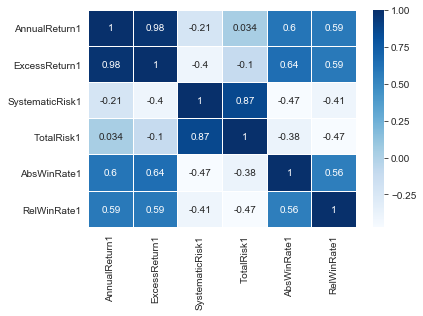

In [10]:
sns.heatmap(corrmat, linewidths=.1, cmap='Blues', annot=True)
plt.show()

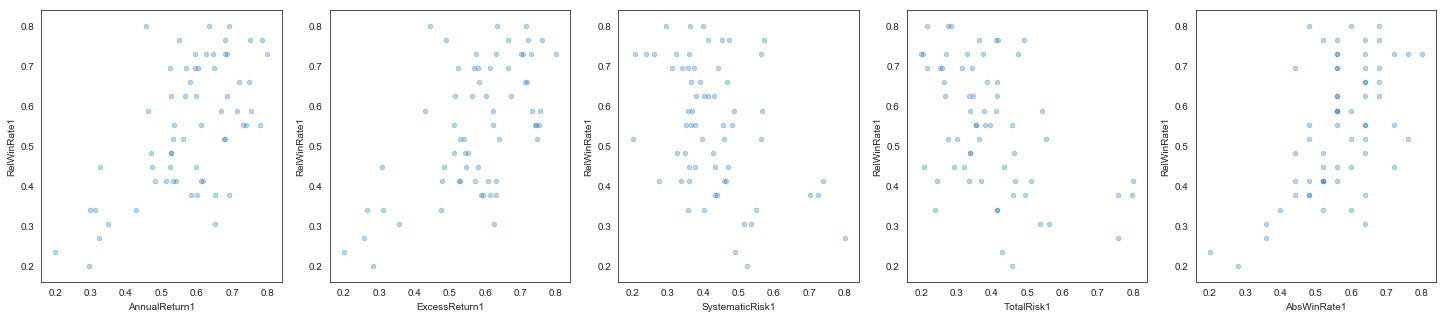

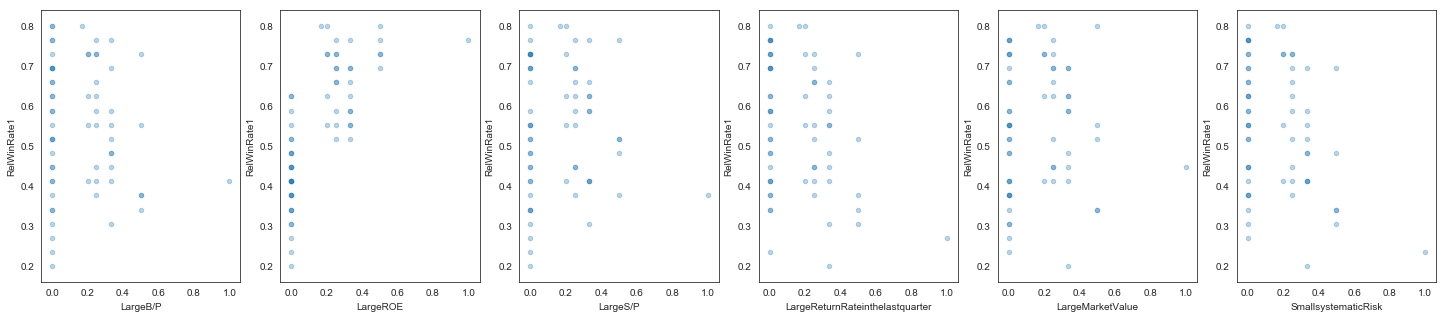

In [11]:
target = df['RelWinRate1']
features = df.drop(['LargeB/P', 'LargeROE', 'LargeS/P', 'LargeReturnRateinthelastquarter',
                    'LargeMarketValue', 'SmallsystematicRisk', 'RelWinRate1'], axis=1)
feature_columns = features.columns

model_df = pd.concat([features, target], axis=1)

fig, axes = plt.subplots(len(feature_columns)//5, 5, figsize=(25, 5))
#plt.tight_layout(pad=5, w_pad=5, h_pad=5)
for col, axis in zip(feature_columns, axes.flatten()):
    model_df.plot.scatter(x=col, y='RelWinRate1', ax=axis, alpha=0.3)
    
target = df['RelWinRate1']
features = df.drop(['AnnualReturn1', 'ExcessReturn1', 'SystematicRisk1',
                    'TotalRisk1', 'AbsWinRate1', 'RelWinRate1'], axis=1)
feature_columns = features.columns

model_df = pd.concat([features, target], axis=1)

fig, axes = plt.subplots(len(feature_columns)//6, 6, figsize=(25, 5))
for col, axis in zip(feature_columns, axes.flatten()):
    model_df.plot.scatter(x=col, y='RelWinRate1', ax=axis, alpha=0.3)

## OLS regression

In [12]:
#X_train, X_test, Y_train, Y_test = train_test_split(
#    df.iloc[:, 7:10], df.RelWinRate1, test_size=0.4, random_state=0)

In [13]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df['RelWinRate1'].values.reshape(-1, 1)
X = df[['ExcessReturn1', 'SystematicRisk1', 'TotalRisk1']]
regr.fit(X, Y)

# Inspect the results.
print('Coefficients \n', regr.coef_)
print('Intercept \n', regr.intercept_)
print('R-squared \n', regr.score(X, Y))

Coefficients 
 [[ 1.05441333  1.53251137 -1.58879536]]
Intercept 
 [-0.09082]
R-squared 
 0.7129560761059046


In [14]:
score = cross_val_score(regr, X, Y, cv=5)
print("OLS Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

OLS Accuracy: 0.60 (+/- 0.17)


In [15]:
predicted = regr.predict(X).ravel()
actual = df['RelWinRate1']
residual = actual - predicted

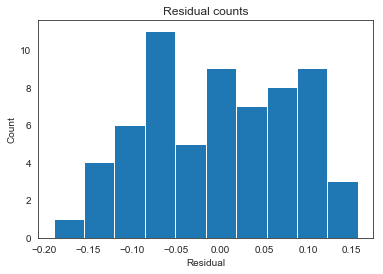

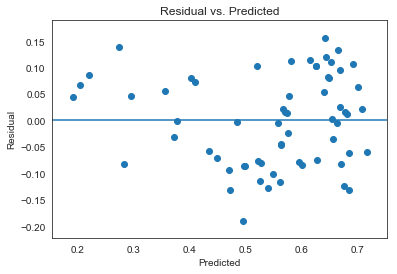

In [16]:
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

## KNN Regression

In [17]:
knn = neighbors.KNeighborsRegressor(n_neighbors=5)

In [18]:
knn.fit(X, Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [19]:
score = cross_val_score(knn, X, Y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Accuracy: 0.28 (+/- 0.43)


In [20]:
print('\nR-squared:')
print(knn.score(X, Y))


R-squared:
0.6390022571982665


In [21]:
predicted = knn.predict(X).ravel()
actual = df['RelWinRate1']
residual = actual - predicted

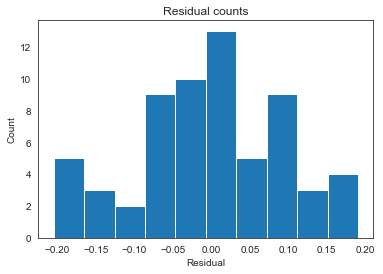

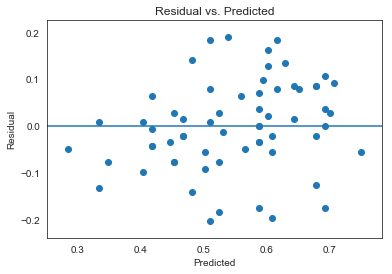

In [22]:
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# Analysis:

In this instance, linear regression performs better than KNN per a higher r-squared. However, more tuning can be done to improve both models. For instance, we can re-run both models using higher correlated variables. In addition, we can re-run KNN on a weighted basis & also change the number of neighbors. The dataset has already been normalized, although for future models, this may be needed. In essence, running the model with all poorly-correlated variables, all well-correlated variables, and a combination of poor and good at different levels of k-nearest neighbors under weighted and unweighted should provide an acceptable model comparison analysis.